## Install waymo_open_dataset package

In [1]:
import os
import math
import numpy as np
import itertools

from tqdm import tqdm

from ad_config_search.waymo_utils import *

from pathlib import Path

import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
def featurize_v1(frames_path):
    """
    Only includes summary of camera-related information.
    """
    frames = frames_from_path(frames_path)
    bbox_info = collect_bbox_info_per_frame(frames)
    vel = get_velocity(frames)
    ego_vehicle_speed = np.sqrt(vel[:, 0]**2 + vel[:, 1]**2 + vel[:, 2] ** 2)
    return {
        "avg_num_bboxes": np.mean(bbox_info["num_bboxes"]),
        "avg_bbox_speed": np.mean([np.mean(list(d.values())) if len(d.values()) > 0 else 0 for d in bbox_info["bbox_speed"]]),
        "avg_bbox_size": np.mean(bbox_info["avg_bbox_size"]),
        "avg_ego_speed": np.mean(ego_vehicle_speed),
        **get_context_info(frames)
    }

In [3]:
def featurize_v2(frames_path):
    """
    Only includes summary of camera-related information.
    """
    frames = frames_from_path(frames_path)
    bbox_info = collect_bbox_info_per_frame(frames)
    vel = get_velocity(frames)
    ego_vehicle_speed = np.sqrt(vel[:, 0]**2 + vel[:, 1]**2 + vel[:, 2] ** 2)
    return {
        "avg_bbox_longevity": np.mean(bbox_info["bbox_longevity"]),
        "90p_bbox_longevity": np.percentile(bbox_info["bbox_longevity"], 90),
        "90p_num_bboxes":  np.percentile(bbox_info["num_bboxes"], 90),
        "90p_bbox_speed":  np.percentile([np.mean(list(d.values())) if len(d.values()) > 0 else 0 for d in bbox_info["bbox_speed"]], 90),
        "90p_bbox_size":  np.percentile(bbox_info["avg_bbox_size"], 90),
        "avg_num_bboxes": np.mean(bbox_info["num_bboxes"]),
        "avg_bbox_speed": np.mean([np.mean(list(d.values())) if len(d.values()) > 0 else 0 for d in bbox_info["bbox_speed"]]),
        "avg_bbox_size": np.mean(bbox_info["avg_bbox_size"]),
        "avg_ego_speed": np.mean(ego_vehicle_speed),
        **get_context_info(frames)
    }

In [8]:
df = pd.DataFrame([{**featurize_v2(path), "scenario_name": (path.parent.stem+"-"+path.stem)} for path in tqdm(list(Path("/data/ges/waymo").glob("*/*.tfrecord")))])


100%|██████████| 148/148 [04:19<00:00,  1.75s/it]


In [9]:
df

,avg_bbox_longevity,90p_bbox_longevity,90p_num_bboxes,90p_bbox_speed,90p_bbox_size,avg_num_bboxes,avg_bbox_speed,avg_bbox_size,avg_ego_speed,time_of_day,weather,location,scenario_name
0,53.444444,80.2,6.0,247.234697,8954.720055,2.417085,101.993745,3410.922277,8.827853,Day,sunny,location_sf,training_0004-S_24
1,117.961538,197.0,20.0,131.738267,38093.553801,15.568528,60.189865,24916.815591,1.613907,Day,sunny,location_sf,training_0004-S_14
2,64.694444,156.0,25.0,51.889146,8095.026669,11.703518,28.880993,3753.227900,18.223584,Day,sunny,location_phx,training_0004-S_0
3,45.413043,67.0,21.0,107.360995,4593.823205,10.550505,72.368302,2318.215522,12.334894,Day,sunny,location_phx,training_0004-S_23
4,121.321429,197.0,73.0,28.401004,12588.225953,68.974619,12.779036,10279.801052,1.585742,Day,sunny,location_sf,training_0004-S_13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,30.791667,54.7,8.0,472.672033,155746.596694,3.713568,170.250245,60098.840417,2.458020,Day,sunny,location_sf,training_0001-S_15
144,150.954545,199.0,20.0,31.987256,6475.869405,16.688442,19.789628,3907.838562,5.888482,Day,sunny,location_phx,training_0001-S_5
145,66.637363,165.0,40.2,52.452393,8235.238310,30.472362,35.758511,6157.662639,28.623804,Day,sunny,location_phx,training_0001-S_22
146,83.633333,159.3,18.0,67.911989,13281.949758,12.671717,42.263428,7677.699864,10.682600,Day,sunny,location_phx,training_0001-S_12


In [10]:
df.to_csv("../data/scenario_features_v2.csv")
df = pd.read_csv("../data/scenario_features_v2.csv")

<AxesSubplot:xlabel='avg_bbox_longevity'>

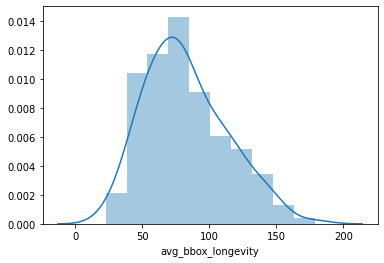

In [11]:
sns.distplot(df["avg_bbox_longevity"])

<AxesSubplot:xlabel='avg_num_bboxes'>

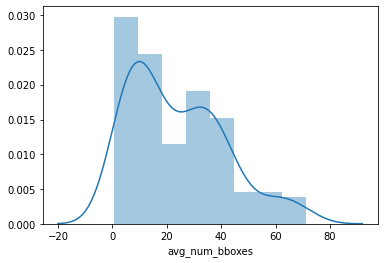

In [6]:
sns.distplot(df["avg_num_bboxes"])

/home/ionel/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mean number of bounding boxes per scenario')

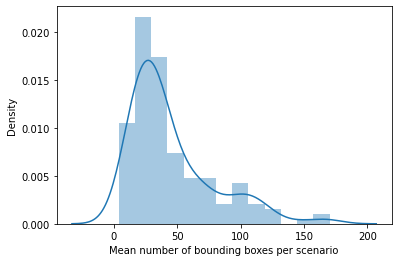

In [10]:
sns.distplot(df["avg_bbox_speed"])
plt.xlabel("Mean number of bounding boxes per scenario")

/home/ionel/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mean bounding box speed per scenario')

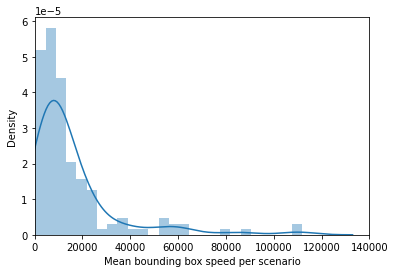

In [9]:
sns.distplot(df["avg_bbox_size"])
plt.xlim(0, 140000)
plt.xlabel("Mean bounding box speed per scenario")

/home/ionel/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Mean ego-vehicle speed [m/s]')

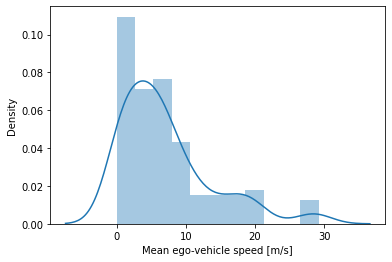

In [6]:
sns.distplot(df["avg_ego_speed"])
plt.xlabel("Mean ego-vehicle speed [m/s]")

<BarContainer object of 3 artists>

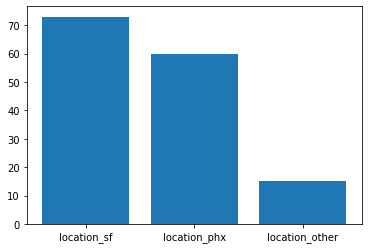

In [118]:
locations = dict(df["location"].value_counts())
plt.bar(locations.keys(), locations.values())

<BarContainer object of 3 artists>

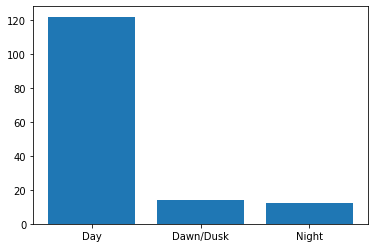

In [120]:
locations = dict(df["time_of_day"].value_counts())
plt.bar(locations.keys(), locations.values())

<BarContainer object of 1 artists>

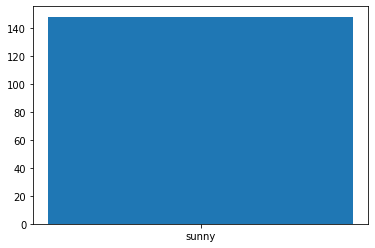

In [119]:
locations = dict(df["weather"].value_counts())
plt.bar(locations.keys(), locations.values())

In [129]:
for path in tqdm(list(Path("/data/ges/waymo/").glob("*/*.tfrecord"))):
    frames = frames_from_path(path)
    weathers = [frame.context.stats.weather for frame in frames]
    tods = [frame.context.stats.time_of_day for frame in frames]
    locs = [frame.context.stats.location for frame in frames]
    assert len(set(weathers)) == 1, path
    assert len(set(tods)) == 1, path
    assert len(set(locs)) == 1, path

100%|██████████| 148/148 [04:23<00:00,  1.78s/it]
